In [1]:
from TextProcessing import *
import pandas as pd
df = pd.read_excel("C:/Users/fredyang/Documents/GitHub/Python3-SMUMSO/MSO_Restart/HDB_annotated.xlsx")
df['processed_text'] = pre_processing(df.text)
df['normalized'] = normalizing(remove_symbols(df.processed_text), 'lemma')
df['normalized'] = remove_punc(df.normalized)

In [2]:
def plot_barh(series, title, highest):
    
    from collections import Counter
    c = Counter(series).most_common(highest)

    labels, values = zip(*c)
    total_hit = len(series)

    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()

    ax.barh(bottom=np.arange(1, len(values)+1), width=values, height=0.8, linewidth=2)
    for i, v in enumerate(values):  # show values
        ax.text(v+3, i+1, str(v), color='blue', fontweight='bold')

    # plot total hits
    ax.barh(bottom=0, width=total_hit, height=0.8, linewidth=2, ec='orange')
    ax.text(total_hit+3, 0, str(total_hit), color='orange', fontweight='bold')
    ax.set_yticklabels(('Total',)+labels)
    ax.set_yticks(ticks = np.arange(0, len(values)+1) )
    ax.set_title(title)
    ax.set_xlabel("count")

    plt.show()


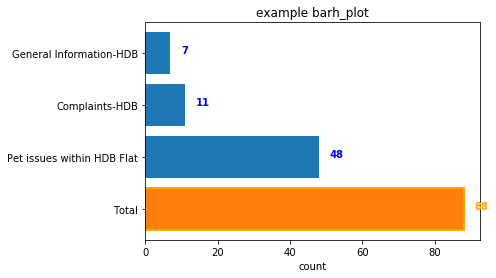

In [3]:
plot_barh(df[df.label!=0].label,"example barh_plot",3) # top 3 labels

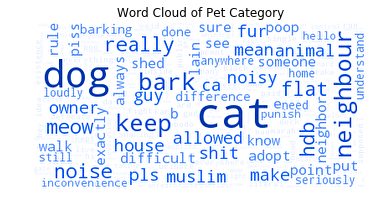

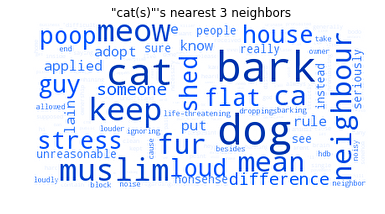

In [6]:
from TextVisuals import *
word_cloud(df[df.label.str.contains('Pet', na=False)].normalized, [], 'Word Cloud of Pet Category')
word_cloud(find_neighbor(df[df.label.str.contains('Pet', na=False)].normalized, ['cat','cats', 'dog', 'dogs'], 3),['pls'], '\"cat(s) & dog(s)\"\'s nearest 3 neighbors')

In [5]:
df.timeStamp.head(3)

0   2017-02-10 11:05:22
1   2017-01-11 09:44:44
2   2017-05-30 16:23:23
Name: timeStamp, dtype: datetime64[ns]